# General requirements for the assignment

- Make appropriate comments to your code
- Use Markdown cells to provide your answers (when applicable)
- Add your code when there is the comment "YOUR CODE HERE".
- Stick to Pep8 standard as much as possible for your coding
- Tag the commit as *Final submission of Assignment 2*
- Submit through GitHub
- Provide your GitHub url to the Ipython notebook as the submisison for Brightspace assignment 2
- Post (interesting) errors in the course Github's issue page

# Assignment Intro

In this assignment, you will be asked to implement some functionalities on the dataset that you worked with in the first assignment.

### DEADLINE FOR THIS ASSIGNMENT IS 01 OCTOBER 2021 BEFORE 23:59

<hr />

## Import libraries
Update this list as you go along the assigment

In [28]:
# YOUR CODE HERE
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests
import csv
import numpy as np
from scipy.signal import find_peaks

## Preparing data

### 1. Read 2020 and 2021 data for your selected country. You only need provincial data for this assignment. Print the first 5 lines of data

In [29]:
# YOUR CODE HERE
df_2020 = pd.read_csv('./Region_Mobility_Report_CSVs/2020_CH_Region_Mobility_Report.csv',parse_dates=True)
df_province_2020 = df_2020[['sub_region_1','place_id','date','retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline','residential_percent_change_from_baseline']]
df_province_2020.head(5)

,sub_region_1,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,NaN,ChIJYW1Zb-9kjEcRFXvLDxG1Vlw,2020-02-15,-1.0,-1.0,31.0,6.0,-2.0,-1.0
1,NaN,ChIJYW1Zb-9kjEcRFXvLDxG1Vlw,2020-02-16,10.0,12.0,30.0,8.0,-2.0,-1.0
2,NaN,ChIJYW1Zb-9kjEcRFXvLDxG1Vlw,2020-02-17,-3.0,-4.0,-3.0,-2.0,-1.0,1.0
3,NaN,ChIJYW1Zb-9kjEcRFXvLDxG1Vlw,2020-02-18,3.0,1.0,34.0,3.0,-2.0,1.0
4,NaN,ChIJYW1Zb-9kjEcRFXvLDxG1Vlw,2020-02-19,-4.0,-4.0,-11.0,-4.0,-3.0,1.0


In [30]:
df_2021 = pd.read_csv('./Region_Mobility_Report_CSVs/2021_CH_Region_Mobility_Report.csv',parse_dates=True)
df_province_2021 = df_2021[['sub_region_1','place_id','date','retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline','residential_percent_change_from_baseline']]
df_province_2021.head(5)

,sub_region_1,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,NaN,ChIJYW1Zb-9kjEcRFXvLDxG1Vlw,2021-01-01,-87.0,-90.0,8.0,-66.0,-86.0,30.0
1,NaN,ChIJYW1Zb-9kjEcRFXvLDxG1Vlw,2021-01-02,-62.0,-38.0,-17.0,-46.0,-37.0,14.0
2,NaN,ChIJYW1Zb-9kjEcRFXvLDxG1Vlw,2021-01-03,-66.0,-53.0,-11.0,-44.0,-24.0,9.0
3,NaN,ChIJYW1Zb-9kjEcRFXvLDxG1Vlw,2021-01-04,-36.0,3.0,-16.0,-37.0,-32.0,14.0
4,NaN,ChIJYW1Zb-9kjEcRFXvLDxG1Vlw,2021-01-05,-38.0,0.0,-7.0,-37.0,-33.0,15.0


In [19]:
#df_2020['date'] = pd.DatetimeIndex(df_2020['date']).year

### 2. For this assignment, select and extract the data for a single province. Name the dataframe for this subset `df_province_selected`

In [31]:
df = df_province_2020.append(df_province_2021)

In [32]:
df['sub_region_1'] == 'Appenzell Ausserrhoden'
df_province_selected = df[df['sub_region_1'] == 'Appenzell Ausserrhoden']

The following show an example from extracting the data for South Holland, the Netherlands

In [33]:
df_province_selected.head()

,sub_region_1,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
642,Appenzell Ausserrhoden,ChIJ979wCHEfm0cRD6-ER66wR4E,2020-02-15,8.0,5.0,NaN,12.0,8.0,NaN
643,Appenzell Ausserrhoden,ChIJ979wCHEfm0cRD6-ER66wR4E,2020-02-16,4.0,NaN,NaN,-3.0,NaN,NaN
644,Appenzell Ausserrhoden,ChIJ979wCHEfm0cRD6-ER66wR4E,2020-02-17,0.0,-3.0,NaN,-4.0,2.0,NaN
645,Appenzell Ausserrhoden,ChIJ979wCHEfm0cRD6-ER66wR4E,2020-02-18,4.0,3.0,NaN,-3.0,1.0,NaN
646,Appenzell Ausserrhoden,ChIJ979wCHEfm0cRD6-ER66wR4E,2020-02-19,-4.0,-5.0,NaN,-5.0,0.0,NaN


In [1]:
#df_province_selected['date'] = pd.DatetimeIndex(df_province_selected['date']).year

### 3. Aggregated measurements

#### Write a function with the following arguments as the input:
- a dataset as a dataframe object
- list of attributes (refers to df.columns)
- a year
- one of the following statistic measurements: mean/median/max/min. You can use [enum](https://docs.python.org/3/library/enum.html) for this argument.
  
The function will then return the required statistic on some attributes of the data for a particular year.

In [34]:
# modify the following line to make the function calculate the 'mean' when the statistic argument is empty.
def calculate_statistic(data, attributes, year, statistic):
    """calculate a statistic

    Args:
        data (Pandas DataFrame): dataset
        attributes (list): list of attributes
        year (int): either 2020 or 2021
        statistic (str): the statistic to calculate: mean/median/max/min
                
    """
    data = data[data['date'].str.contains(str(year))]
    data = data.loc[:, attributes].values
    
    if statistic=='mean':
        np_statistic = np.nanmean(data, axis=0)
    elif statistic=='median':
        np_statistic = np.nanmedian(data, axis=0)
    elif statistic=='max':
        np_statistic = np.nanmax(data, axis=0)
    elif statistic=='min':
        np_statistic = np.nanmin(data, axis=0)
    
    df_statistic = pd.DataFrame({statistic:np_statistic}, index=attributes)
    
    print(df_statistic)


#### Call your calculate_statistic function and print the results with three different input arguments

In [35]:
calculate_statistic(df_province_selected, 
                    ['retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline'],
                    2020,
                   'min')

                                                     min
retail_and_recreation_percent_change_from_baseline -77.0
grocery_and_pharmacy_percent_change_from_baseline  -15.0


## Activity changes

Since there are quite some noises when looking at daily data, it is easier to observe data on a larger aggregation level. The following code derives 7-day averages for the provice data. We also prepare a plot to visualise it for you.

In [36]:
df_province_selected['date'] = pd.to_datetime(df_province_selected['date'])
df_province_agg = df_province_selected.resample('7D', on='date').mean()
df_province_agg.reset_index(inplace=True)
df_province_agg.head()

<ipython-input-36-3d1378534e0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_province_selected['date'] = pd.to_datetime(df_province_selected['date'])


,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2020-02-15,2.857143,-1.166667,NaN,-0.285714,1.833333,NaN
1,2020-02-22,-4.428571,6.000000,NaN,-1.714286,0.833333,NaN
2,2020-02-29,4.285714,2.500000,NaN,-0.857143,1.166667,NaN
3,2020-03-07,-2.428571,7.000000,NaN,-6.428571,-0.166667,NaN
4,2020-03-14,-29.428571,23.833333,NaN,-25.571429,-18.500000,NaN


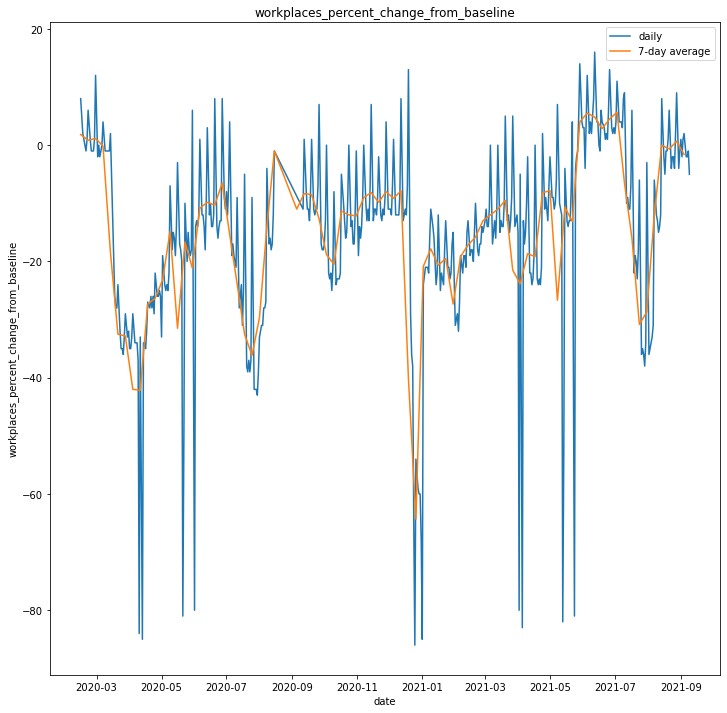

In [37]:
#Code to visualise the raw data and sampled data
fig, ax = plt.subplots(figsize=(12,12))
ax.set_title('workplaces_percent_change_from_baseline')
sns.lineplot(x='date', y='workplaces_percent_change_from_baseline', data=df_province_selected, label='daily', ax=ax)
sns.lineplot(data=df_province_agg, x='date', y='workplaces_percent_change_from_baseline', label='7-day average', ax=ax)
plt.show()

## Identifying peaks

Let's focus on the 7-day averaged data. This averaged time series data shows how many times workplace changes reach peaks. Your task is to identify these moments. 

### 4. Identify peaks with personal code

Complete the function below. Your function should return (at least) a list of indexes where there are peaks in data.

In [38]:
def my_find_peaks(data, activity, **kwargs):
    """[summary]

    Args:
        data (dataframe): dataframe with at least two attribute columns: date and the given activity
        activity (str): one of the (six) available mobility activities
        kwargs: a dictionary of arguments. Use these to customise your function on finding peaks
    """
    # YOUR CODE HERE
    activity_array = df_province_agg.loc[:, activity].values
    
    peaks_list = []
    
    for ind in range(1, activity_array.shape[0] - 1):
        
        if activity_array[ind] > activity_array[ind - 1] and activity_array[ind] > activity_array[ind + 1]:
            
            peaks_list.append(ind)
    
    return peaks_list

In [39]:
activity = 'grocery_and_pharmacy_percent_change_from_baseline'
max_ind = my_find_peaks(
    df_province_agg, 
    activity
)
max_ind

[1, 4]

In [40]:
# Assign the data related to the max_ind to df_max
df_max = df_province_agg.iloc[max_ind, :]
df_max.head()

,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
1,2020-02-22,-4.428571,6.000000,NaN,-1.714286,0.833333,NaN
4,2020-03-14,-29.428571,23.833333,NaN,-25.571429,-18.500000,NaN


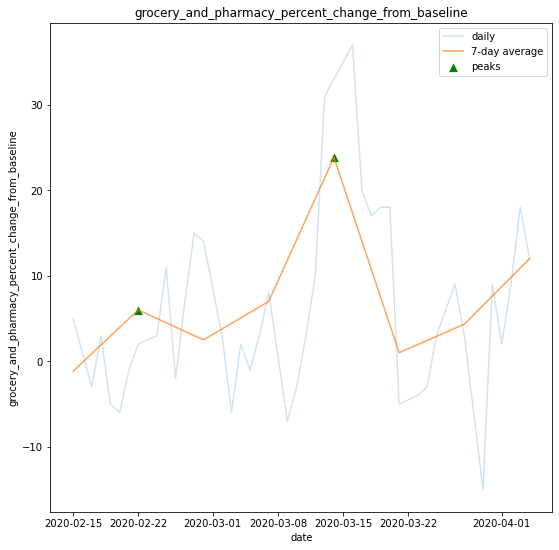

In [21]:
#Code to visualise the raw data, sampled data and the peaks
# create a figure and an axis to plot
fig, ax = plt.subplots(figsize=(9,9))
# set the title of the plot
ax.set_title(activity)
# plot the daily values
sns.lineplot(x='date', y=activity, data=df_province_selected, label='daily', ax=ax, alpha=0.2)
# plot the 7-day average
sns.lineplot(data=df_province_agg, x='date', y=activity, label='7-day average', ax=ax, alpha=0.7)
# label the peaks
sns.scatterplot(x='date', y=activity, data=df_max, label='peaks', ax=ax, marker='^', color='g', s=100)
plt.show()

### 5. Identify peaks using library scipy - [find_peaks](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html)

In [41]:
# YOUR CODE HERE
peaks, _ = find_peaks(df_province_agg.loc[:, activity].values)
peaks

array([1, 4], dtype=int64)

### 6. Identify valleys

You have identified the peaks in the data above using both your personal approach and the scipy library. Here, you can also identify the valleys (or troughs) using either of these approaches.

In [42]:
# YOUR CODE HERE
troughs, _ = find_peaks(0 - df_province_agg.loc[:, activity].values)
troughs

array([2, 5], dtype=int64)

### 7. Identify all the peaks (and potentially valleys) for all the activities in the data. Print out the peaks for each of the activities. 

If you are brave, you can make use of the plotting piece of code that is provided above to plot the results.

retail_and_recreation_percent_change_from_baseline
peaks: [2]
valleys: [1, 6]



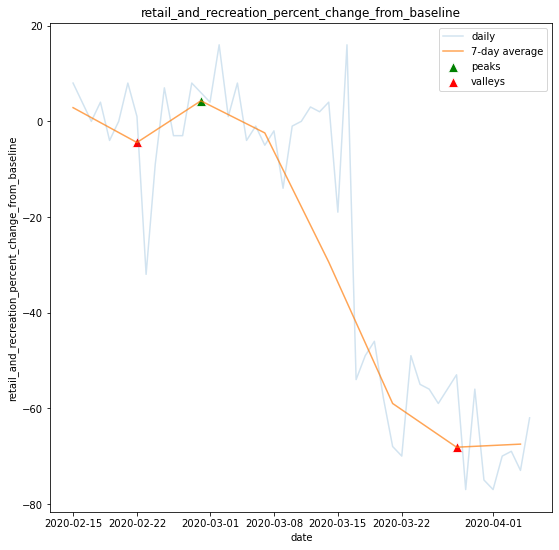

grocery_and_pharmacy_percent_change_from_baseline
peaks: [1, 4]
valleys: [2, 5]



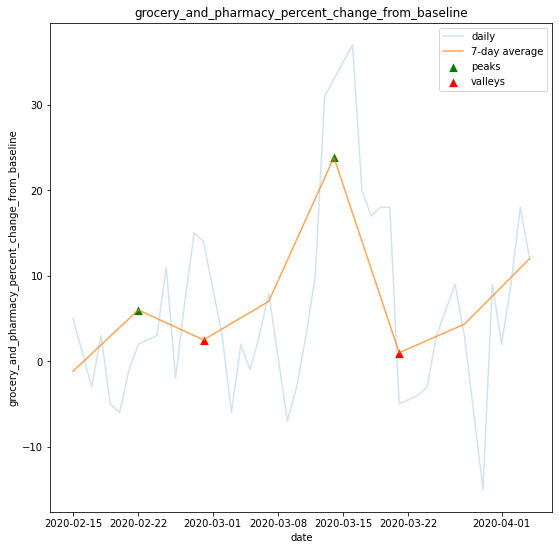

parks_percent_change_from_baseline
peaks: []
valleys: []



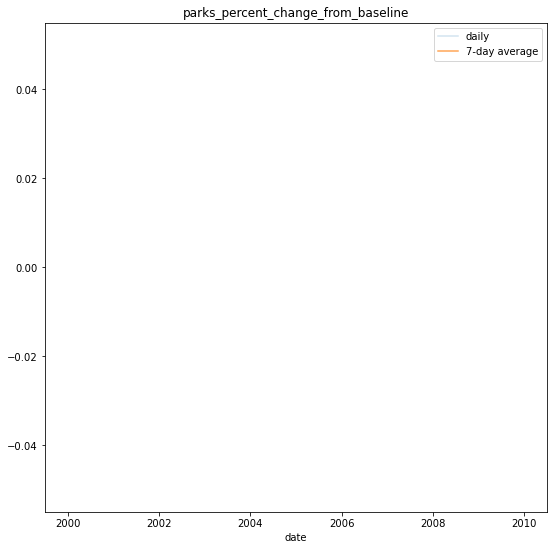

transit_stations_percent_change_from_baseline
peaks: [2, 9, 15, 19, 22, 30, 35, 38, 40, 42, 47, 53, 58, 60, 62, 64, 67, 69, 71, 78]
valleys: [1, 5, 10, 16, 21, 24, 34, 37, 39, 41, 45, 50, 56, 59, 61, 63, 66, 68, 70, 75, 80]



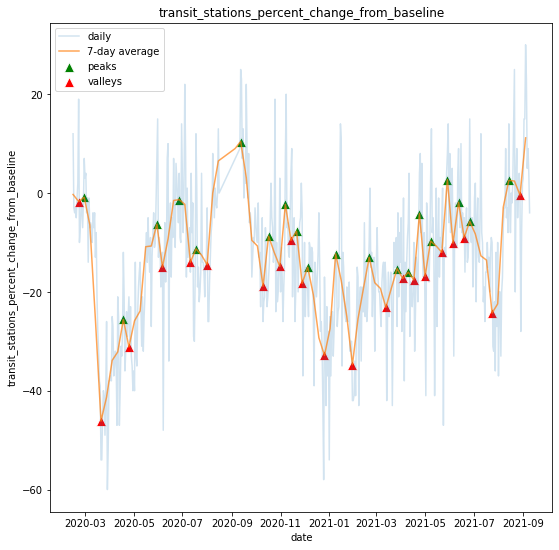

workplaces_percent_change_from_baseline
peaks: [2, 12, 14, 17, 19, 30, 35, 39, 41, 43, 47, 49, 57, 60, 63, 65, 68, 72, 78, 80]
valleys: [1, 8, 13, 15, 18, 23, 34, 37, 40, 42, 45, 48, 50, 59, 61, 64, 66, 70, 75, 79]



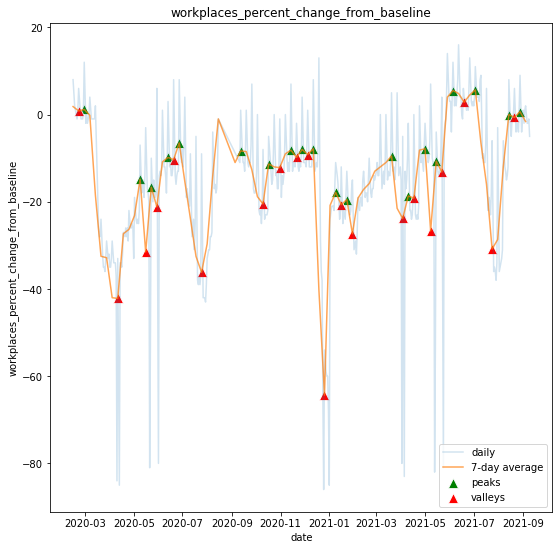

residential_percent_change_from_baseline
peaks: [34, 37, 39, 42, 45, 49, 56, 60, 65, 68, 70, 73, 76, 78]
valleys: [35, 38, 40, 43, 47, 54, 58, 64, 67, 69, 71, 74, 77]



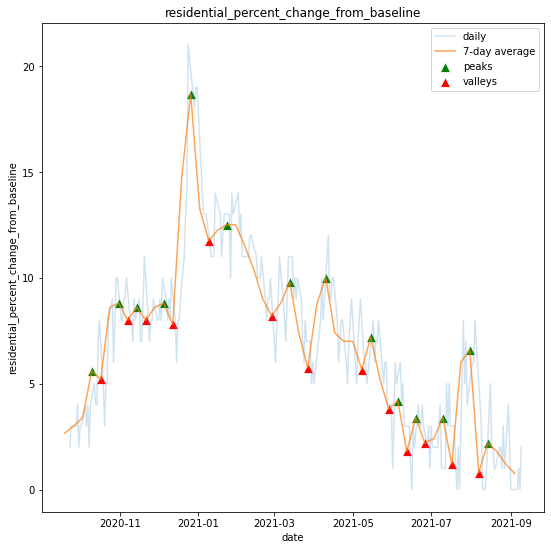

In [43]:
# YOUR CODE HERE
activities = ['retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline',
             'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline',
             'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']

for activity in activities:
    
    print(activity)
    print('peaks: ', end='')
    peaks = list(find_peaks(df_province_agg.loc[:, activity].values)[0])
    print(peaks)
    print('valleys: ', end='')
    valleys = list(find_peaks(0 - df_province_agg.loc[:, activity].values)[0])
    print(valleys)
    print()
    
    df_peaks = df_province_agg.iloc[peaks, :]
    df_valleys = df_province_agg.iloc[valleys, :]
    
    # create a figure and an axis to plot
    fig, ax = plt.subplots(figsize=(9,9))
    # set the title of the plot
    ax.set_title(activity)
    # plot the daily values
    sns.lineplot(x='date', y=activity, data=df_province_selected, label='daily', ax=ax, alpha=0.2)
    # plot the 7-day average
    sns.lineplot(data=df_province_agg, x='date', y=activity, label='7-day average', ax=ax, alpha=0.7)
    # label the peaks
    sns.scatterplot(x='date', y=activity, data=df_peaks, label='peaks', ax=ax, marker='^', color='g', s=100)
    # label the valleys
    sns.scatterplot(x='date', y=activity, data=df_valleys, label='valleys', ax=ax, marker='^', color='r', s=100)
    plt.show()
    
    

### 8. Is there any common dates (or periods) among these peaks (and/or valleys) of different activities

*Food for thoughts*:
- One of the most naive way to find the overlapping dates is to look for common indexes (or dates) of the peaks/valleys
- A more general solution is to have a tolerance level between the days. For example, Sep 19 and Sep 20 can be considered matched (or overlapped) if the tolerance level is at least one day.

In [44]:
# YOUR CODE HERE
peaks_list = []
valleys_list = []

for activity in activities:
    
    peaks_list.append(list(find_peaks(df_province_agg.loc[:, activity].values)[0]))
    valleys_list.append(list(find_peaks(0 - df_province_agg.loc[:, activity].values)[0]))

types = ['peak', 'valley']

for ind_1, peak_or_valley_1 in enumerate(peaks_list + valleys_list):
    
    for ind_2, peak_or_valley_2 in enumerate(peaks_list + valleys_list):
        
        set_common_dates = set(peak_or_valley_1) & set(peak_or_valley_2)
        
        if len(set_common_dates) != 0 and ind_1 != ind_2:
            
            print(activities[ind_1 % 6], '(' ,types[ind_1 // 6], ')')
            print(activities[ind_2 % 6], '(' ,types[ind_2 // 6], ')') 
            print('common dates:')
            print([str(pd.to_datetime(i).date()) for i in df_province_agg.loc[set_common_dates, 'date'].values])      
            print()


retail_and_recreation_percent_change_from_baseline ( peak )
transit_stations_percent_change_from_baseline ( peak )
common dates:
['2020-02-29']

retail_and_recreation_percent_change_from_baseline ( peak )
workplaces_percent_change_from_baseline ( peak )
common dates:
['2020-02-29']

retail_and_recreation_percent_change_from_baseline ( peak )
grocery_and_pharmacy_percent_change_from_baseline ( valley )
common dates:
['2020-02-29']

grocery_and_pharmacy_percent_change_from_baseline ( peak )
retail_and_recreation_percent_change_from_baseline ( valley )
common dates:
['2020-02-22']

grocery_and_pharmacy_percent_change_from_baseline ( peak )
transit_stations_percent_change_from_baseline ( valley )
common dates:
['2020-02-22']

grocery_and_pharmacy_percent_change_from_baseline ( peak )
workplaces_percent_change_from_baseline ( valley )
common dates:
['2020-02-22']

transit_stations_percent_change_from_baseline ( peak )
retail_and_recreation_percent_change_from_baseline ( peak )
common dates:

## OPTIONAL

Append population/density for provinces/municipalities to the dataframe. The data for Netherlands is available [here](https://www.cbs.nl/en-gb/news/2021/30/population-growth-picks-up-again)


In [ ]:
# YOUR CODE HERE
